### Преамбула

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
np.random.seed(42)
%matplotlib inline

In [19]:
class ABC_Class(ABC):
    @abstractmethod
    def generate(self, n):
        pass

In [20]:
class Uniform_Rectangle_Class(ABC_Class):
    def __init__(self, x_lim, y_lim):
        self.x_lim = np.array(x_lim)
        self.y_lim = np.array(y_lim)
    def generate(self,n):
        x = np.random.rand(n) * (self.x_lim[1] - self.x_lim[0]) + self.x_lim[0]
        y = np.random.rand(n) * (self.y_lim[1] - self.y_lim[0]) + self.y_lim[0]
        return np.array(list(zip(x,y)))

In [21]:
class Normal_Class(ABC_Class):
    def __init__(self,mu, sigma_x, sigma_y):
        """
        mu -- точка
        """
        self.mu = np.array(mu)
        self.sigma_x = sigma_x
        self.sigma_y = sigma_y
    def generate(self,n):
        x = np.random.normal(loc = self.mu[0], scale = self.sigma_x, size =n)
        y = np.random.normal(loc = self.mu[1], scale = self.sigma_y, size =n)
        return np.array(list(zip(x,y)))

In [28]:
def D_M(x,mu, dots):
    Cov = np.cov(dots.T)
    return np.sqrt( ((x - mu)[:np.newaxis]).T @ np.linalg.inv(Cov) @ (x- mu) )

In [37]:
def predict(data):
    z = []
    for i in range(len(data)):
        dist_list =[]
        for j,mu in enumerate(means):
            dist_list.append(D_M(data[i], mu, dots_list[j]))
        dist_list = np.array(dist_list)
        z.append(np.argmin(dist_list))
    return np.array(z)

### Генеруємо точки

In [55]:
Type1 = Uniform_Rectangle_Class([0,2], [3,5])
Type2 = Normal_Class([5,3], 0.2, 0.6)
Type3 = Uniform_Rectangle_Class([1,3], [0,2])

N = 20
dots1 = Type1.generate(N)
dots2 = Type2.generate(N)
dots3 = Type3.generate(N)
dots_list = [dots1, dots2,dots3]

In [56]:
means = []
for dots in dots_list:
    means.append(np.sum(dots, axis=0)/N)
means = np.array(means)

Text(0.5, 1.0, 'Точки та їхні медіани')

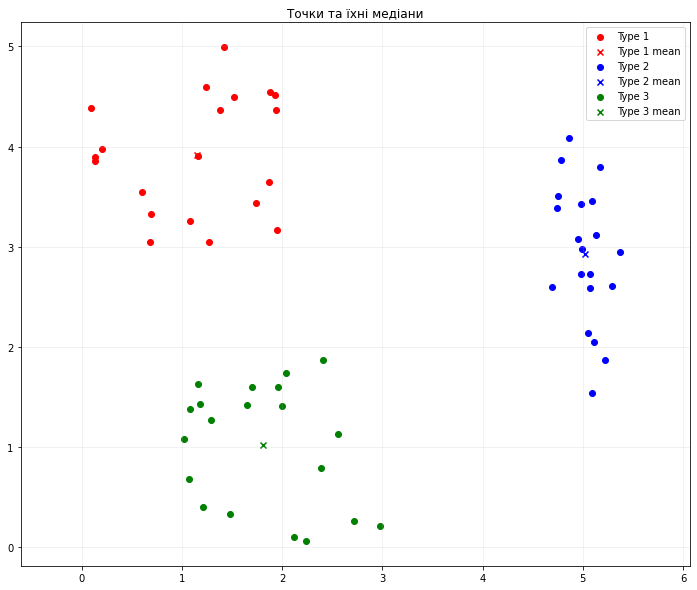

In [57]:
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
labels = [f'Type {i+1}' for i in range(3)]
for index,dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
    plt.scatter(means[index][0], means[index][1], marker='x', c = colors[index], label =
labels[index]+' mean')
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Точки та їхні медіани')


In [58]:
M = 100
x_lim = [0,6]
y_lim = [0,5]
t_x = np.random.rand(M)*(x_lim[1] - x_lim[0]) + x_lim[0]
t_y = np.random.rand(M)*(y_lim[1] - y_lim[0]) + y_lim[0]
test_dots = np.array(list(zip(t_x,t_y)))
print(test_dots.shape)

(100, 2)


### Визначаємо типи точок

In [59]:
res_points = [[],[],[]]
err_points = []
for tdot in test_dots:
    dist_list =[]
    for i, class_dots in enumerate(dots_list):
        dist_list.append(D_M(tdot, means[i], class_dots))
    min_dist = min(dist_list)
    if dist_list.count(min_dist) >1:
        err_points.append(dot)
        print(f'point : {tdot} has type {[i for i in range(3) if dist_list[i] == min_dist]}')
    else:
        index =dist_list.index(min_dist)
        print(f'point : {tdot} has type {index}')
        res_points[index].append(tdot)
for i in range(3):
    res_points[i] = np.array(res_points[i])

point : [0.48068908 1.02920605] has type 2
point : [5.36889994 0.5595981 ] has type 1
point : [3.28555426 1.34874806] has type 2
point : [4.90378662 0.28543428] has type 1
point : [2.71390971 2.65584764] has type 0
point : [3.86146617 4.68302846] has type 0
point : [3.15841597 0.1967177 ] has type 2
point : [4.38953713 0.61054957] has type 2
point : [0.48977989 2.26099514] has type 2
point : [0.3621125  4.66937509] has type 0
point : [1.4826194  1.58078052] has type 2
point : [0.95726808 2.53617404] has type 0
point : [5.2307014 0.2078643] has type 1
point : [1.31528392 0.741716  ] has type 2
point : [5.85519153 4.93315061] has type 1
point : [2.02137475 4.82559348] has type 0
point : [1.09270749 0.0246999 ] has type 2
point : [4.73819104 4.75905893] has type 1
point : [3.95224665 3.19559969] has type 0
point : [2.9891743  4.33959147] has type 0
point : [3.33218131 2.27369928] has type 2
point : [4.31521067 2.57798014] has type 1
point : [1.37072845 2.4442329 ] has type 2
point : [5.97

### Класифікуємо точки

Text(0.5, 1.0, 'Класифікація')

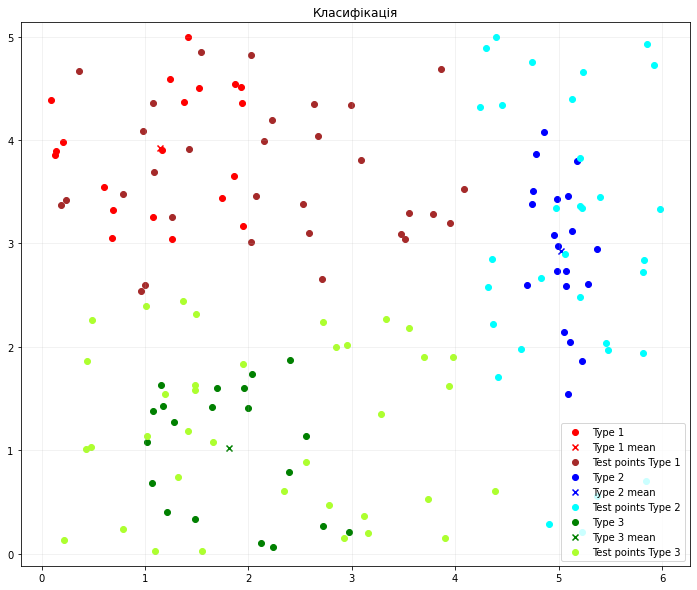

In [60]:
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
res_colors = ['brown', 'cyan', 'greenyellow']
# res_colors = colors
labels = [f'Type {i+1}' for i in range(3)]
res_labels = [f'Test points Type {i+1}'for i in range(3)]
for index, dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
    plt.scatter(means[index][0], means[index][1], marker='x', c = colors[index], label = labels[index]+' mean')
    plt.scatter(res_points[index].T[0],res_points[index].T[1], c= res_colors[index], label = res_labels[index] )
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Класифікація')

In [61]:
xx, yy = np.meshgrid(np.linspace(*x_lim, 500),np.linspace(*y_lim, 500))
z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
print(xx.shape, yy.shape, Z.shape)

(500, 500) (500, 500) (500, 500)


### Результати

C:\Users\andri\AppData\Local\Temp/ipykernel_14344/676694205.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Text(0.5, 1.0, 'Результат')

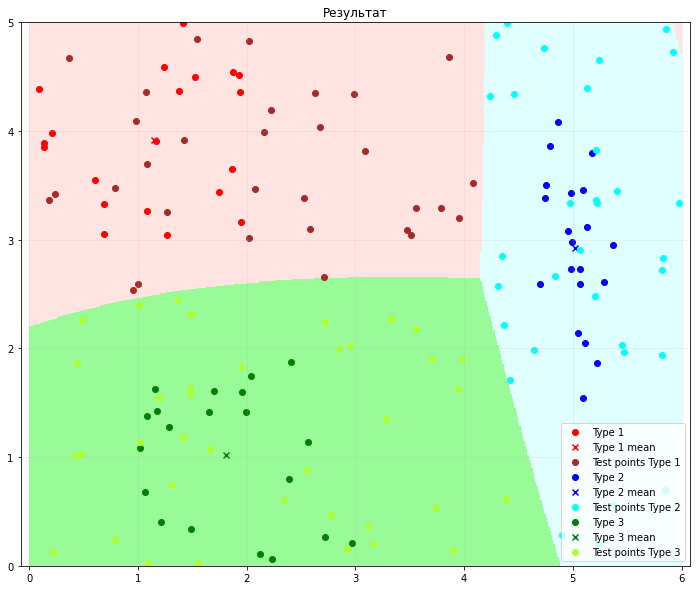

In [62]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
res_colors = ['brown', 'cyan', 'greenyellow']
# res_colors = colors
labels = [f'Type {i+1}' for i in range(3)]
res_labels = [f'Test points Type {i+1}'for i in range(3)]
cmap_light = ListedColormap(['mistyrose', 'lightcyan', 'palegreen'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
for index, dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
    plt.scatter(means[index][0], means[index][1], marker='x', c = colors[index], label = labels[index]+' mean')
    plt.scatter(res_points[index].T[0],res_points[index].T[1], c= res_colors[index], label = res_labels[index] )
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend(loc = 'best')
plt.title('Результат')
